<a href="https://colab.research.google.com/github/koteswar-e/project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')

Dropping CustomerID

In [ ]:
dataframe = dataset.drop(['CustomerID'], axis=1)
#data = dataset.iloc[:,1:].values

Exploratory Data Analysis (EDA)

In [ ]:
dataframe.head()
dataframe.shape
dataframe.info()
dataframe.head()
dataframe.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Examine Count customer by Gender

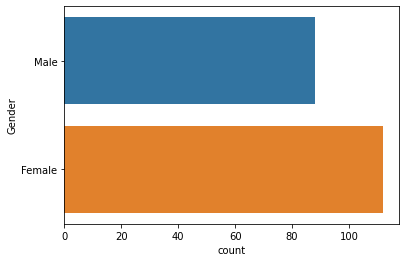

In [ ]:
import seaborn as sns
sns.countplot(y = 'Gender' , data = dataframe)
#data['Gender'].value_counts().plot(kind='bar');


Pair Plot

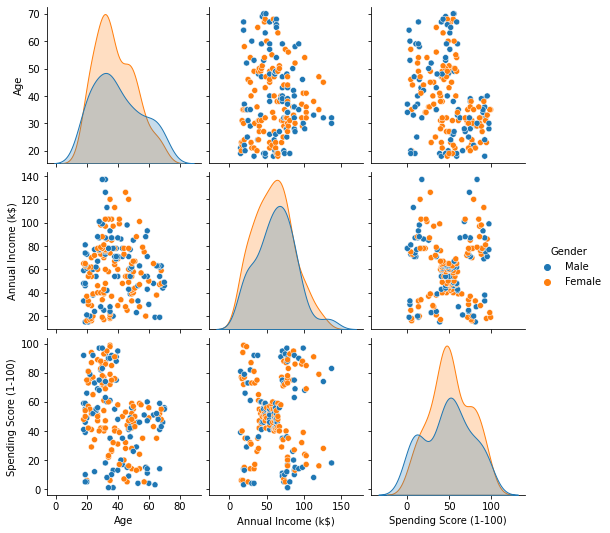

In [ ]:
sns.pairplot(dataframe, hue="Gender")

Age Distribution

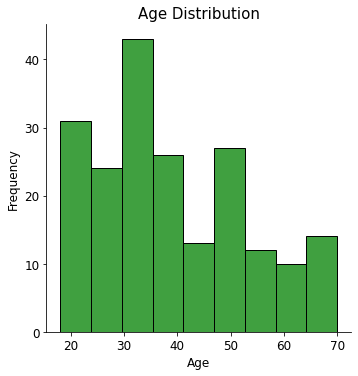

In [ ]:
sns.displot(dataframe['Age'],color = 'green')
plt.title('Age Distribution', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# plt.savefig('age_distribution.png')
plt.show()


Another Bar Plot

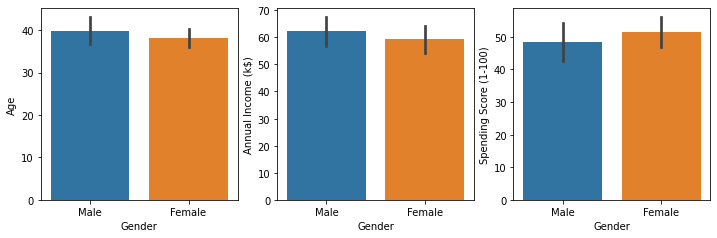

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(3,3,1)
sns.barplot(y='Age',x='Gender', data=dataframe);
ax2 = fig.add_subplot(3,3,2)
sns.barplot(y='Annual Income (k$)',x='Gender', data=dataframe);
ax3 = fig.add_subplot(3,3,3)
sns.barplot(y='Spending Score (1-100)',x='Gender', data=dataframe);

3-D Plot

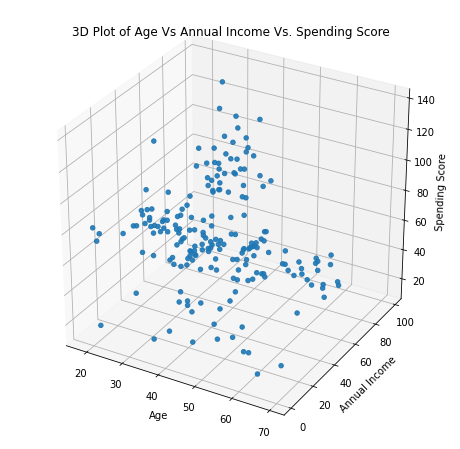

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection = '3d')
x = dataframe['Age']
y = dataframe['Spending Score (1-100)']
z = dataframe['Annual Income (k$)']
ax.scatter(x, y, z, alpha=.9)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")
ax.set_title("3D Plot of Age Vs Annual Income Vs. Spending Score")
plt.show()

Feature engineering
Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['Gender'] = le.fit_transform(dataframe['Gender'])

Statistical summary

In [ ]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Including Age, Annual Income and Spending Score only

In [ ]:
data = dataframe[['Age','Annual Income (k$)','Spending Score (1-100)']]

Max Age, Annual Income and Spending Score

In [ ]:
max(data['Annual Income (k$)'])
min(data['Annual Income (k$)'])
max(data['Spending Score (1-100)'])

99

Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_f = scaler.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']])

Convert to DataFrame

In [ ]:
data_f = pd.DataFrame(data_f,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])

NameError: ignored

Age Vs. Annual Income

Text(0.5, 1.0, 'Age Vs. Annual Income')

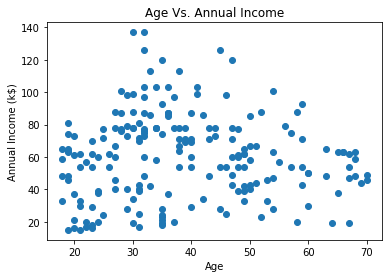

In [ ]:
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title("Age Vs. Annual Income")

Age Vs. Spending Score

Text(0.5, 1.0, 'Age Vs. Spending Score (1-100)')

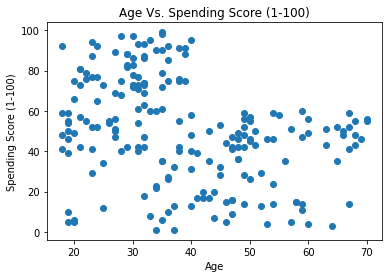

In [ ]:
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title("Age Vs. Spending Score (1-100)")

Annual Income Vs. Spending Score

Text(0.5, 1.0, 'Annual Income (k$) Vs. Spending Score (1-100)')

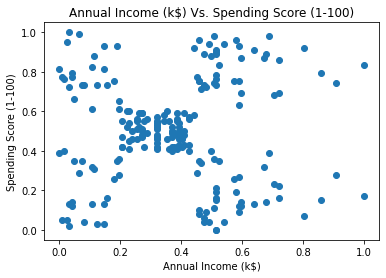

In [ ]:
plt.scatter(data_f['Annual Income (k$)'],data_f['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title("Annual Income (k$) Vs. Spending Score (1-100)")

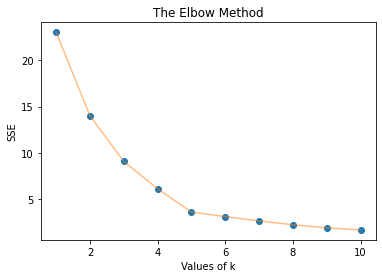

In [ ]:
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
   kmeans.fit(data_f[['Annual Income (k$)','Spending Score (1-100)']])
   sse.append(kmeans.inertia_)
plt.plot(range(1,11),sse,'o')
plt.plot(range(1,11),sse,'-',alpha=0.5)
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
plt.show()

Training the K-Means model on the dataset

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state =42)
y_pred = kmeans.fit_predict(data_f[['Annual Income (k$)','Spending Score (1-100)']]) 

Print the predicted clusters

In [ ]:
print(y_pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Appending Cluster's column to data_f

In [ ]:
data_f['Cluster'] = y_pred

Check

In [ ]:
data_f.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.019231,0.000000,0.387755,2
1,0.057692,0.000000,0.816327,3
2,0.038462,0.008197,0.051020,2
3,0.096154,0.008197,0.775510,3
4,0.250000,0.016393,0.397959,2


The Centriods

In [ ]:
kmeans.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883]])

Visualising the clusters

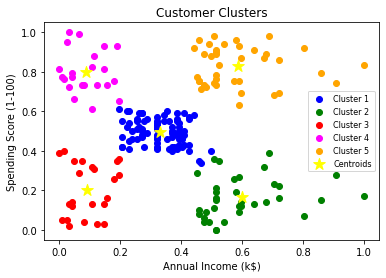

In [ ]:
df1 = data_f[data_f.Cluster == 0]
df2 = data_f[data_f.Cluster == 1]
df3 = data_f[data_f.Cluster == 2]
df4 = data_f[data_f.Cluster == 3]
df5 = data_f[data_f.Cluster == 4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'], color = 'blue',label = 'Cluster 1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'], color = 'green',label = 'Cluster 2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'], color = 'red',label = 'Cluster 3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'], color = 'magenta',label = 'Cluster 4')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'], color = 'orange',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='yellow',marker = '*', s = 150,label='Centroids')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Clusters")
plt.legend(fontsize=8)
plt.show()

Appending Cluster's column to original dataframe: dataset
Adding 1 to cluster indices to reflect actual cluster numbers

In [ ]:
y_pred_cluster = y_pred + 1

In [ ]:
dataset['Cluster'] = y_pred_cluster

In [ ]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,2
197,198,Male,32,126,74,5
198,199,Male,32,137,18,2


The Different Clusters in our dataset

In [ ]:
cluster1 = dataset[dataset.Cluster ==1]
cluster2 = dataset[dataset.Cluster ==2]
cluster3 = dataset[dataset.Cluster ==3]
cluster4 = dataset[dataset.Cluster ==4]
cluster5 = dataset[dataset.Cluster ==5]

Printing them

In [ ]:
cluster1.head()
cluster2.head()
cluster3.head()
cluster4.head()
cluster5.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,5
125,126,Female,31,70,77,5
127,128,Male,40,71,95,5
129,130,Male,38,71,75,5
131,132,Male,39,71,75,5


Counts

In [ ]:
cluster1.count()
cluster2.count()
cluster3.count()
cluster4.count()
cluster5.count()

CustomerID                39
Gender                    39
Age                       39
Annual Income (k$)        39
Spending Score (1-100)    39
Cluster                   39
dtype: int64

Counts better organized

In [ ]:
clusters = [[cluster1.Cluster.count()], 
 [cluster2.Cluster.count()],
 [cluster3.Cluster.count()],
 [cluster4.Cluster.count()],
 [cluster5.Cluster.count()]]

Data frame of counts

In [ ]:
clusters = pd.DataFrame(clusters, index=['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5'],columns=['Total Number:'])

Transposing counts

In [ ]:
clusters.transpose()

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
Total Number:,81,35,23,22,39


Print data frame of counts

In [ ]:
clusters

,Total Number:
Cluster1,81
Cluster2,35
Cluster3,23
Cluster4,22
Cluster5,39


Visualizing counts

Text(0.5, 1.0, 'Cluster Counts')

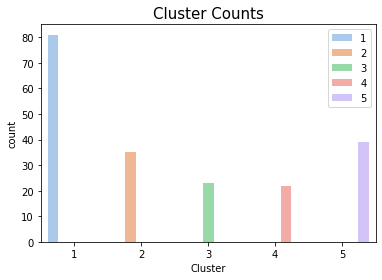

In [ ]:
cluster_counts=sns.countplot(x="Cluster", hue="Cluster", data=dataset, palette='pastel')
cluster_counts.legend(fontsize=10)
cluster_counts.set_title("Cluster Counts",color="black", size="15")


Another way to visualize counts

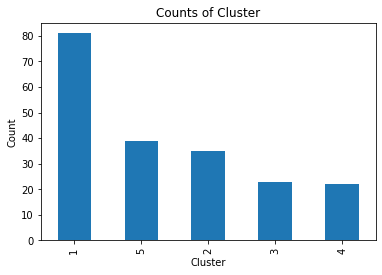

In [ ]:
dataset['Cluster'].value_counts().plot(kind='bar',title="Counts of Cluster",xlabel="Cluster", ylabel="Count");

Another way to visualize counts

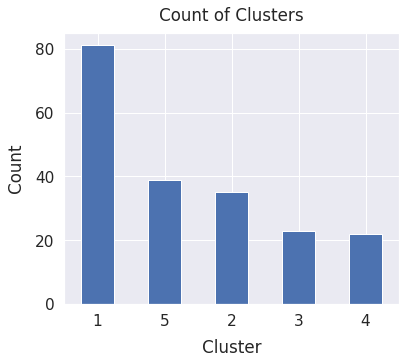

In [ ]:
sns.set(font_scale=1.4)
dataset['Cluster'].value_counts().plot(kind='bar', figsize=(6, 5), rot=0)
plt.xlabel("Cluster", labelpad=10)
plt.ylabel("Count", labelpad=10)
plt.title("Count of Clusters", y=1.02);
plt.show()